# Heart failure EDA and Prediction
------------------------------------

## Context:

Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body. Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise undetectable by medical doctors. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Machine learning can predict patients’ survival from their data and can individuate the most important features among those included in their medical records.

The purpose of this project is to develop a machine learning algorithm that can successfully predict heart failure event based on 12 healthy-related metrics.

## About the dataset:
This dataset contains 12 features that can be used to predict mortality by heart failure:
* **age**: The age of the patient
* **anaemia**: Decrease of red blood cells or hemoglobin (0=False, 1=True)
* **high_blood_pressure**: If a patient has hypertension (0=False, 1=True)
* **creatinine_phosphokinase**: Level of the CPK enzyme in the blood	 	 	 
* **diabetes**: If the patient has diabetes	(0=False, 1=True)
* **ejection_fraction**: Percentage of blood leaving the heart at each contraction	 	 
* **sex**: Woman or man	(0=female, 1=male)
* **platelets**: Platelets in the blood	(kiloplatelets/mL)
* **serum_creatinine**:	Level of creatinine in the blood (mg/dL)
* **serum_sodium**: Level of sodium in the blood (mEq/L)	
* **smoking**: If the patient smokes (0=False, 1=True)
* **time**: Follow-up period (Days)
* **death_event**: The fatality outcome (0=False, 1=True)

## Kernel

### Import working libraries and read the dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

import xgboost

In [2]:
# Import and read the first 10 rows of the dataset:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
# Inspect column datatype and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Looking from the info table, we can see that the dataset has no missing values, and all columns have appropriate datatype. We can move forward and explore a bit further by looking at the descriptive statistics for each variable.

In [4]:
# Inpsect descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


A few interesting observations just from the preliminary examination of descriptive statistics:
* The age range in the dataset is between 40 and 95, which makes sense, as the majority of people develop heart diseases later in life.
* The dataset contains both continuous variables (ex: age, creatinine_phosphokinase, platelets, etc.), and categorical variables (ex: diabetes, high_blood_pressure, sex, etc.). We will look at each type of feature separately in order to understand each variable better.
* The variance for some features is quite large (ex: platelets, etc.), indicating a wide range of values.

Now let's inspect each variable more in depth in the next section.

### Exploratory data analysis (EDA):
#### Inspect continuous variables

In this section, we will visualize and inspect continuous variables in the dataset. Specifically, we want to understand the distribution of each variable, and transform the variable appropriately to exclude outliners.

In [5]:
# Helper function to create chart for continuos variables:
def create_charts(col):
    plt.figure(figsize=(20, 8)) # set figure size
    sns.set_style('darkgrid') # set background style

    plt.subplot(1, 2, 1) # create histogram for continuous variable
    sns.distplot(df[col])
    plt.axvline(df[col].mean(), linestyle='-',
                c='black', linewidth=2, label='mean')
    plt.axvline(df[col].median(), c='red', linestyle='--',
                linewidth=2, label='median')
    plt.legend()
    plt.title('distribution of {}'.format(col))

    plt.subplot(1, 2, 2) # create boxplot to inspect variable value range and outliners
    sns.boxplot(x=col, data=df, orient="v", whis=2, palette="Set2")
    sns.swarmplot(x=col, data=df, color=".25", orient="v")
    plt.title('boxplot of {}'.format(col))

    plt.show()

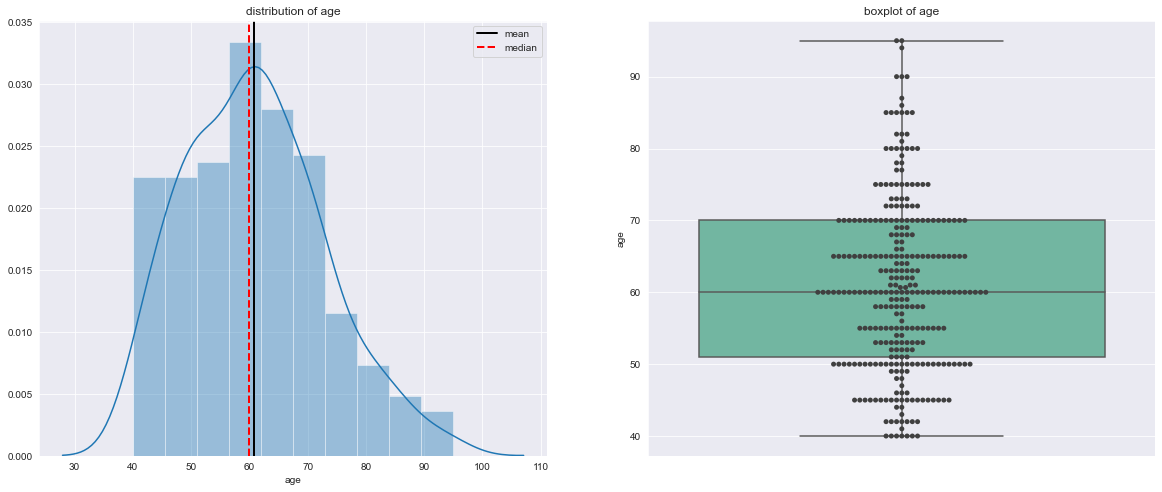

In [6]:
# Inspect 'age' variable:
create_charts("age")

The age distribution looks typical. Patients' age ranges between 40 and 95, with no unexpected outliners.

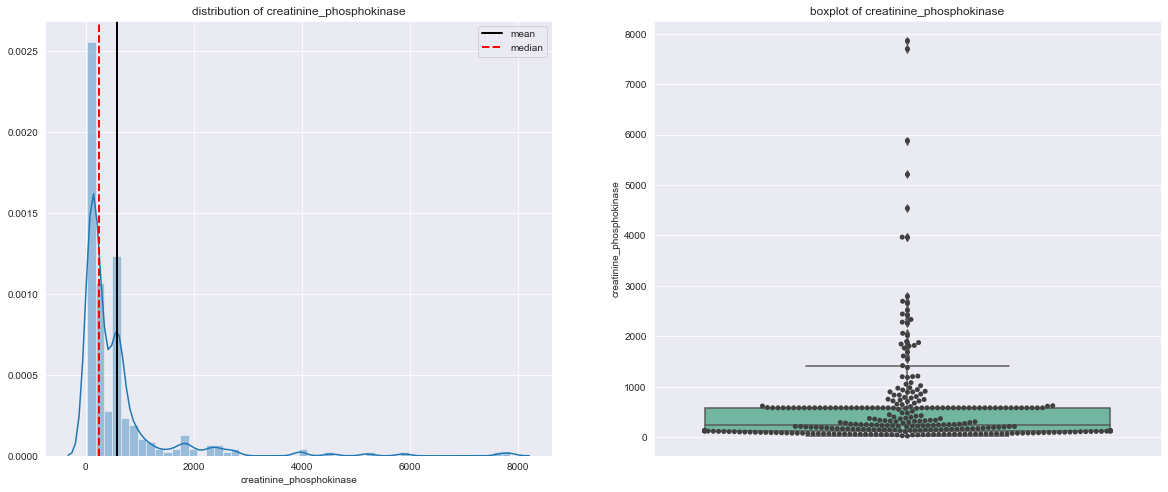

In [7]:
# Inspect 'creatinine_phosphokinase' variable:
create_charts("creatinine_phosphokinase")

As we can see from the chart above, creatinine_phosphokinase is one of the variables with high variance. The distribution of creatinine_phosphokinase doesn't follow a normal distribution, and we have a lot of outliners with unexpectedly high values. Let's transform this feature using log transformation to see if we'll have a better representation values.

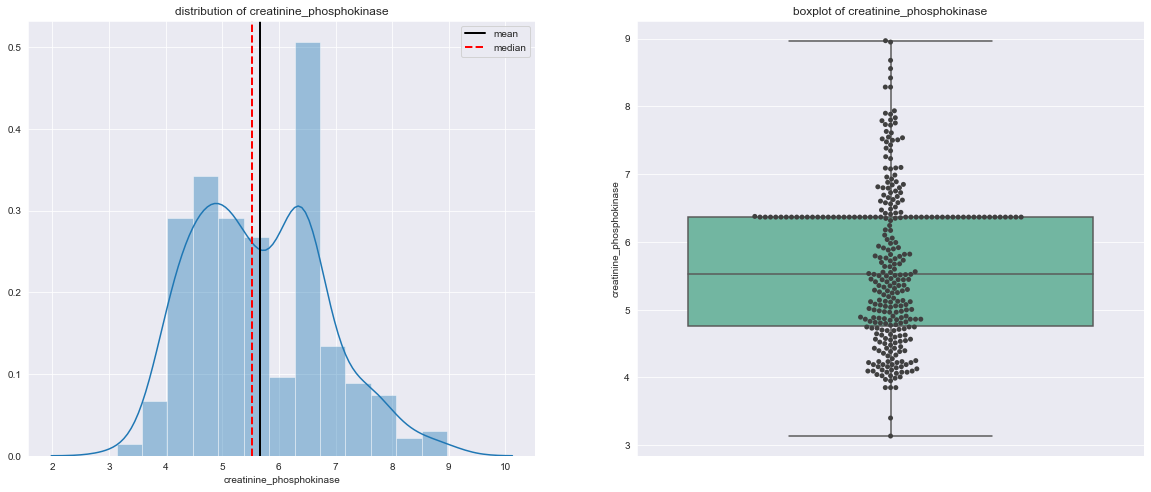

In [8]:
# Transform 'creatinine_phosphokinase' using log_transformation
df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])

# Replot the charts:
create_charts("creatinine_phosphokinase")

That's much better. As we can see, log transformation got rid of outliners for 'creatinine_phosphokinase', and bring the feature to a state much better aligned with a normal distribution.

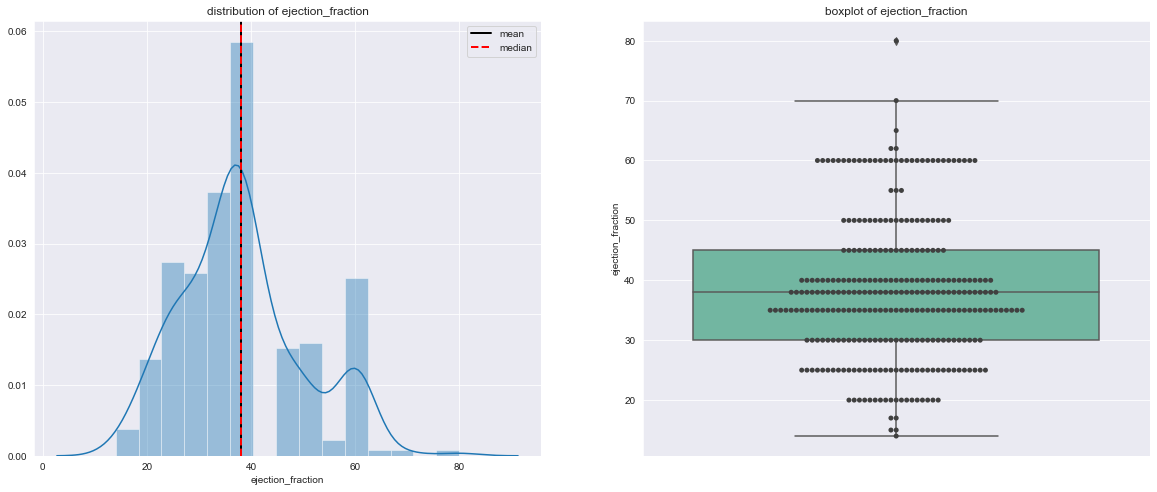

In [9]:
# Inspect 'ejection_fraction' variable:
create_charts('ejection_fraction')

In [10]:
# Get rid of outliner that has ejection_fraction >70%
index = df[df['ejection_fraction']>70].index #print out index with ejection_fraction >70%
print(index)
df = df.drop(index = index) # drop index that has ejection_fraction >70%

Int64Index([64], dtype='int64')


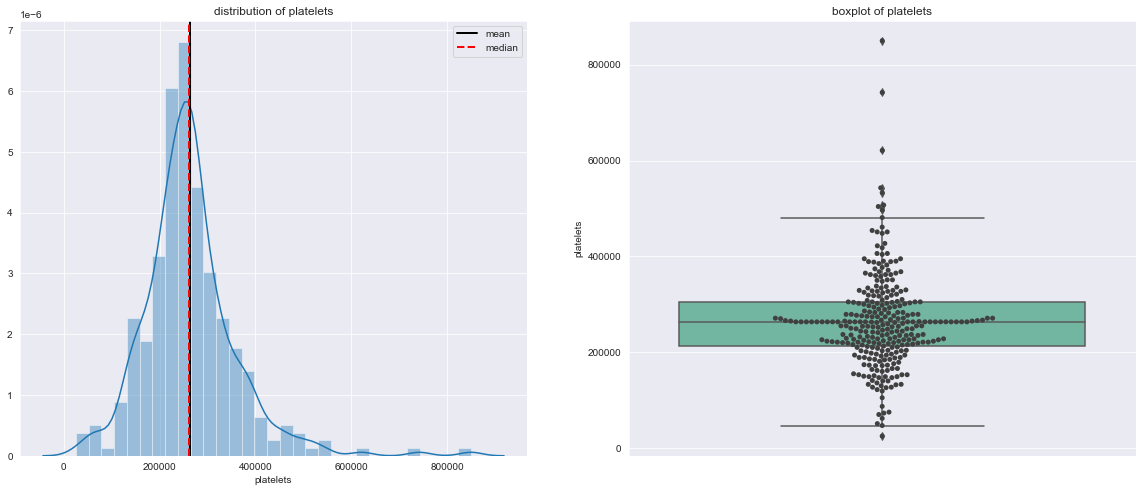

In [11]:
# Inspect 'platelets' variable:
create_charts('platelets')

Again, we can see from the histogram and boxplot that 'platelets' is also one of the variables with high variance. The distribution of 'platelets' is left skewed, indicating that there are some potential big outliners that we'll want to get rid of in order to improve prediction. Let's use winsorization technique to get rid of outliners for this variable.

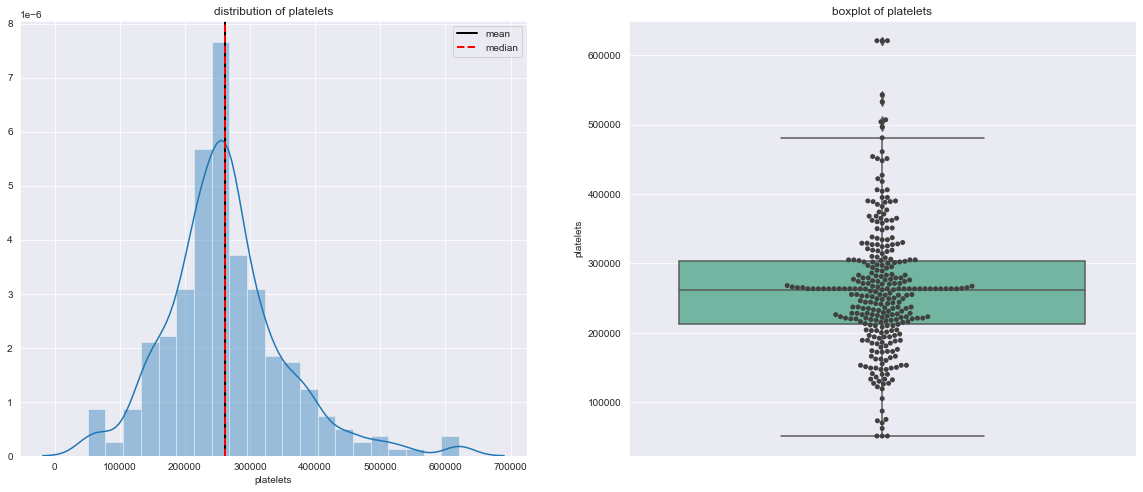

In [12]:
# Detect and remove outliners:
df['platelets'] = winsorize(df['platelets'], (0.01,0.01), inplace=True)

# Replot the variable to compare before and after removing outliners
create_charts('platelets')

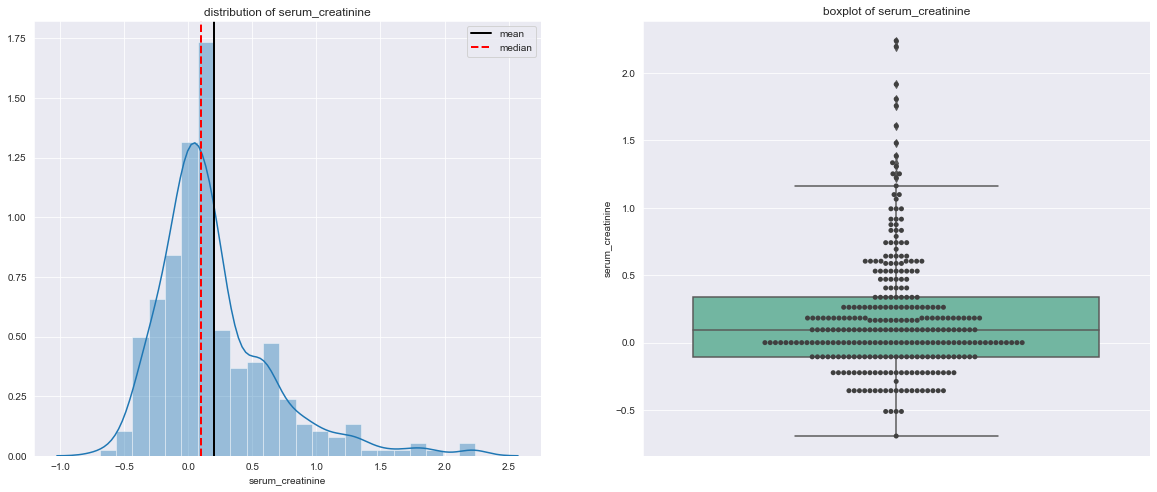

In [13]:
# Inspect 'serum_creatinine' variable. We'll use log transformation for this variable
# as it also has a lot of outliners and to bring it closer to a normal distribution
df['serum_creatinine'] = np.log(df['serum_creatinine'])
create_charts('serum_creatinine')

In [14]:
# Remove outliners
indices_creatinine = df[df['serum_creatinine']>1.5].index.tolist()
print(indices_creatinine)

df = df.drop(index=indices_creatinine)

[9, 28, 52, 131, 217, 228]


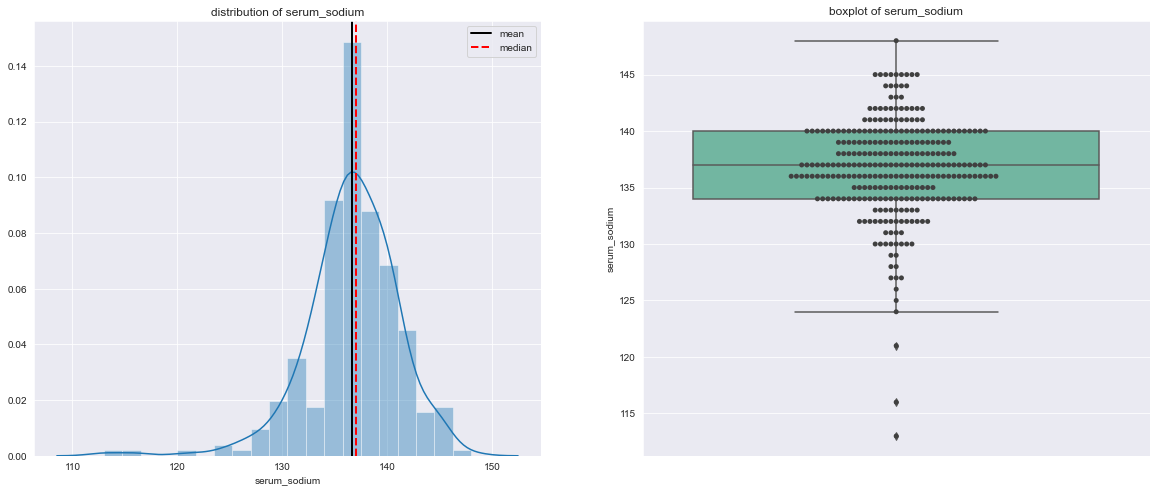

In [15]:
# Inspect 'serum_sodium' variable
create_charts('serum_sodium')

In [16]:
# Remove outliners:
indices_soidum = df[df['serum_sodium'] < 125].index.tolist()
print(indices_soidum)

df = df.drop(index=indices_soidum)

[4, 19, 126, 199]


In [17]:
# After outliner removal, we have 288 entries instead of 299
df.shape

(288, 13)

#### Inspect categorical variables

For this section, we will inspect categorical variables within the dataset. I originally want to compare the metrics between sex. However, since we have 98 female patients and 190 male patients, comparing by sex will skew the statistics. We'll compare the metrics against the target variable instead.

In [18]:
# Group by death_event
df_group = df.groupby('DEATH_EVENT').sum().reset_index()

# Helper function to visualize categorical data
def count_plot(col):
    plt.figure(figsize=(8,6))  # set figure size
    sns.set(font_scale=1.3)  # set font size
    sns.set_style('darkgrid')  # set background

    g = sns.barplot(x='DEATH_EVENT', y=col, data=df_group, palette="Set2")
    for index, row in df_group.iterrows():
        g.text(row['DEATH_EVENT'], row[col], round(row[col], 2), color='black', ha="center")

    g.set(xlabel='Death event (0=False, 1=True)', ylabel='count of cases with {}'.format(col))
    plt.title('Bar chart comparing {} against death rate'.format(col))
    plt.show()

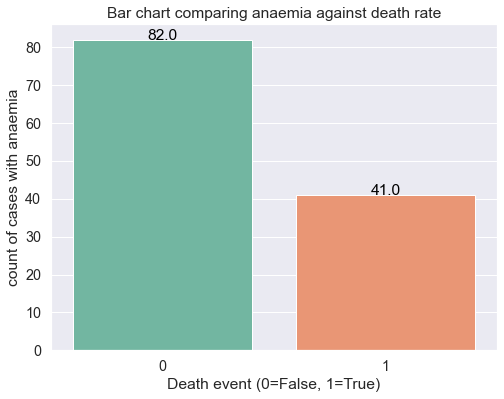

In [19]:
# Inspect decrease of red blood cells or hemoglobin (anaemia) by death event
count_plot('anaemia')

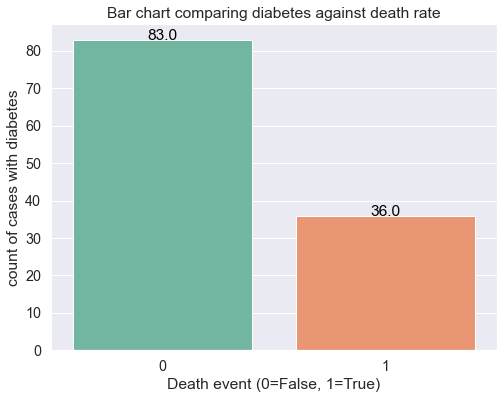

In [20]:
# Inspect diabetes by death event
count_plot('diabetes')

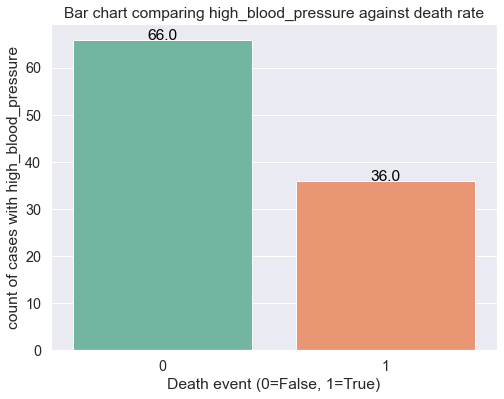

In [21]:
# Inspect high blood pressure by death event
count_plot('high_blood_pressure')

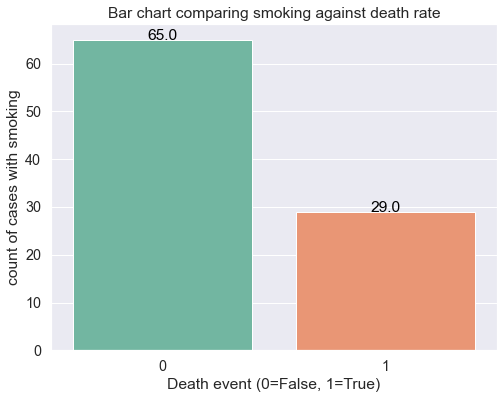

In [22]:
# Inspect smoking by death event
count_plot('smoking')

Overall, there are more patients with underlying health issues that survived than those that died of heart failure. However, is it because our this is the common pattern, or is it because our sample overall recorded more survival event than death event?

It is important to understand that the statistics above could be inaccurate because our sample is skewed. Let's inspect the target variable next to see the underlying relationship between variables.

#### Inspect target variable

In [23]:
# Inspect target variable
count = df['DEATH_EVENT'].value_counts()
print('The sample has {} death cases and {} survival cases'.format(count[0], count[1]))

The sample has 199 death cases and 89 survival cases


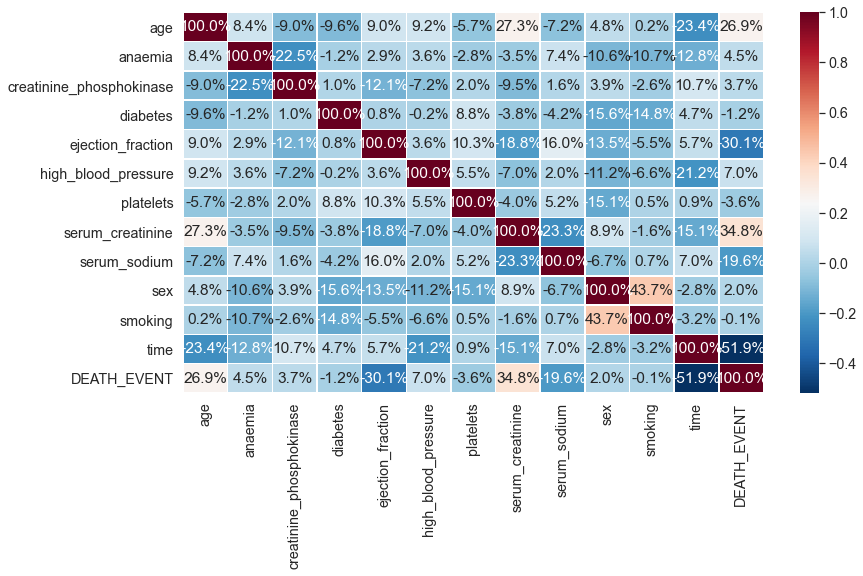

In [43]:
# Since the target variable is highly skewed, let's take a look at the correlation matrix to 
# inspect the realtionship between variables:
corr_matrix = df.corr()

plt.figure(figsize=(13,7))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt=".1%", cmap = "RdBu_r")

Looking from the heatmap above, we can observe a couple of intersting points:
* 'sex' and 'smoking' are highly correlated. As it turned out, more male patients smoke than female patients.
* 'age' and 'serum_creatinine' level are remarkably positively correlated to heart failure death rate while 'ejection_fraction' and 'time' are highly negatively correlated to heart failure death rate.

### Feature transformation

In this section, we will perform feature scaling to normalize our dataset. We'll also handle class imbalance issue using SMOTE.

#### Feature scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. Because of that, we will perform feature scaling in order to normalize the range of independent variables or features of data

In [25]:
# Split the data into target and explanatory variables:
X = df.iloc[:,:-1]
Y = df['DEATH_EVENT']

In [26]:
# Scale the dataset using MinMaxScaler:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# Print out the dataset after scaling:
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.553802,0.0,0.117647,1.0,0.375439,0.613864,0.217391,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.470588,0.0,0.372558,0.362551,0.478261,1.0,0.0,0.007117
2,0.454545,0.0,0.316774,0.0,0.117647,0.0,0.194737,0.439366,0.173913,1.0,1.0,0.010676
3,0.181818,1.0,0.269796,0.0,0.117647,0.0,0.278947,0.613864,0.521739,1.0,0.0,0.010676
4,0.909091,1.0,0.122494,0.0,0.509804,1.0,0.268421,0.659884,0.304348,1.0,1.0,0.014235
5,0.636364,1.0,0.406199,0.0,0.019608,0.0,0.133333,0.402560,0.521739,1.0,0.0,0.021352
6,0.363636,1.0,0.448577,1.0,0.901961,0.0,0.707018,0.362551,0.260870,1.0,1.0,0.021352
7,0.454545,0.0,0.329224,0.0,1.000000,0.0,0.372558,0.505167,0.565217,0.0,0.0,0.021352
8,0.636364,1.0,0.215790,0.0,0.470588,1.0,0.556140,0.956174,0.260870,1.0,1.0,0.021352
9,0.400000,0.0,0.395416,0.0,0.215686,1.0,0.354386,0.270278,0.652174,1.0,1.0,0.021352


#### Handle class imbalance

In [27]:
# Split data into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)
print('The shape of data before handling class imbalance')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

The shape of data before handling class imbalance
(216, 12) (216,)
(72, 12) (72,)


In [28]:
# Use SMOTE to handle class imbalance:
sm = SMOTE(random_state=123)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train.ravel())

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print(' ')
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os == 0)))

# Reassign newly sampled dataset:
X_train = X_train_os
y_train = y_train_os

print(' ')
print('The shape of data after handling class imbalance is ')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Before OverSampling, counts of label '1': 68
Before OverSampling, counts of label '0': 148
 
After OverSampling, counts of label '1': 148
After OverSampling, counts of label '0': 148
 
The shape of data after handling class imbalance is 
(296, 12) (296,)
(72, 12) (72,)


### Building prediction models

In this section, we'll use a variety of predictive algorithms to build a heart failure prediction model. We'll use a variety of metrics to measure accuracy of each model such as accuracy score, F1 score, and confusion matrix.

#### Model Comparison

In [29]:
# Helper function to execute the model and calculate accuracy score
def model_execute(mod, model_name, X_train, y_train, X_test, y_test):
    %timeit mod.fit(X_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    y_pred = mod.predict(X_test)
    print('')
    print('Accuracy on train set is {}'.format(acc.mean()))
    print('Accuracy on test set is {}'.format(accuracy_score(y_test, y_pred)))
    print('F1 score is {}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision score is {}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall score is {}'.format(metrics.recall_score(y_test, y_pred)))
    
    cm = confusion_matrix(y_pred,y_test)
    print('Confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
    plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
    plt.show()

1.42 ms ± 8.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Gaussian Naive Bayes

Accuracy on train set is 0.8107909604519774
Accuracy on test set is 0.75
F1 score is 0.5714285714285714
Precision score is 0.5714285714285714
Recall score is 0.5714285714285714
Confusion matrix


<Figure size 432x288 with 0 Axes>

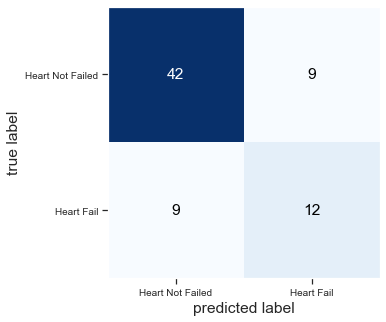

In [30]:
# Gaussian model
gnb = GaussianNB()
model_execute(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

1.53 ms ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
BernoulliNB

Accuracy on train set is 0.6690960451977401
Accuracy on test set is 0.625
F1 score is 0.4489795918367347
Precision score is 0.39285714285714285
Recall score is 0.5238095238095238
Confusion matrix


<Figure size 432x288 with 0 Axes>

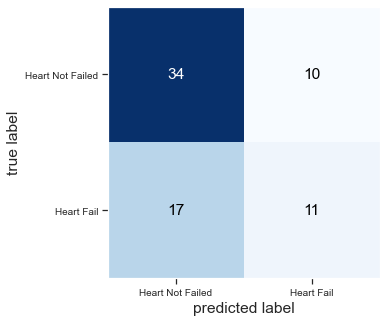

In [31]:
# Bernoulli model
bnb = BernoulliNB(alpha=1)
model_execute(bnb, "BernoulliNB", X_train, y_train, X_test, y_test)

196 ms ± 4.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest Classifier

Accuracy on train set is 0.871638418079096
Accuracy on test set is 0.875
F1 score is 0.7906976744186046
Precision score is 0.7727272727272727
Recall score is 0.8095238095238095
Confusion matrix


<Figure size 432x288 with 0 Axes>

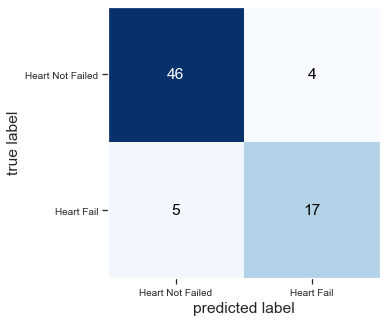

In [32]:
# Random forest classifier:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=2, random_state=123)
model_execute(rfc, "Random Forest Classifier", X_train, y_train, X_test, y_test)

11.5 ms ± 98.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Support Vector Classifier

Accuracy on train set is 0.5201129943502825
Accuracy on test set is 0.6944444444444444
F1 score is 0.15384615384615385
Precision score is 0.4
Recall score is 0.09523809523809523
Confusion matrix


<Figure size 432x288 with 0 Axes>

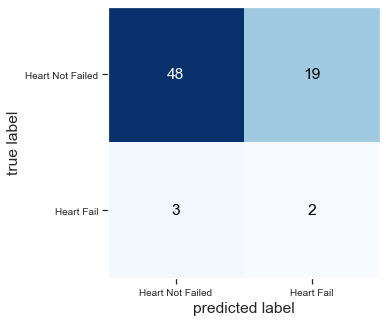

In [33]:
# Support vector machine
svm = SVC(probability= True, kernel='rbf', random_state=123)
model_execute(svm, "Support Vector Classifier", X_train, y_train, X_test, y_test)

152 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Gradient Boosting Classifier

Accuracy on train set is 0.878361581920904
Accuracy on test set is 0.7777777777777778
F1 score is 0.6363636363636365
Precision score is 0.6086956521739131
Recall score is 0.6666666666666666
Confusion matrix


<Figure size 432x288 with 0 Axes>

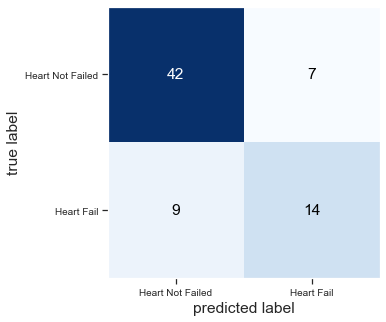

In [34]:
# Gradient Boosting Classifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1, n_estimators=300)
model_execute(gradientboost_clf, "Gradient Boosting Classifier", X_train, y_train, X_test, y_test)

21.1 ms ± 793 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
XGB Classifier

Accuracy on train set is 0.8580790960451978
Accuracy on test set is 0.8611111111111112
F1 score is 0.7500000000000001
Precision score is 0.7894736842105263
Recall score is 0.7142857142857143
Confusion matrix


<Figure size 432x288 with 0 Axes>

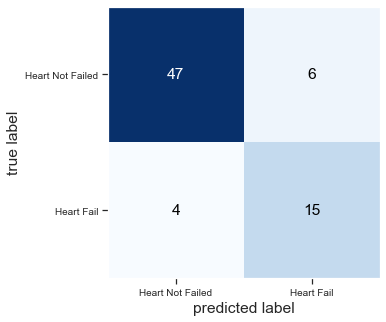

In [35]:
# XGBoost classifier:
xgb_clf = xgboost.XGBRFClassifier(random_state=123)
model_execute(xgb_clf, "XGB Classifier", X_train, y_train, X_test, y_test)

In this section, we tried 6 different machine learning algorithms, with random forest and xgboost received the highest accuracy scores of 87.5% and 86.1%, respectively. These 2 models also have the highest precision and recall scores.

In the next section, we'll try find tuning the parameters for xgboost model to try to further improve performance.

#### Model tunning

In [36]:
# XGBoost parameter tuning:

model = xgboost.XGBRFClassifier()

scorings = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
params = {
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth':[4, 5, 6, 7, 8],
        'colsample_bytree': [0.5, 1],
        'min_child_weight': [0, 1, 2],
        'subsample': [0, 1]
        }

# Cross validation using RandomizedSearchCV to find the best parameters:
clf = RandomizedSearchCV(model, params, cv=10, scoring=scorings, refit='AUC', return_train_score=True)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             obj...
                                             tree_method=None,
       

In [37]:
# Print out the best parameters for xgb model:
print((clf.best_score_, clf.best_params_))

(0.9651111111111111, {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 0, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5})
